<a href="https://colab.research.google.com/github/melder2/MLA_MRE/blob/main/MLA5_MRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Michael Elder**  

## Standard Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. 

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [5]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

### Statistical and Visual Exploration

land_type
1    1072
2     479
3     961
4     415
5     470
7    1038
Name: land_type, dtype: int64


<Axes: ylabel='land_type'>

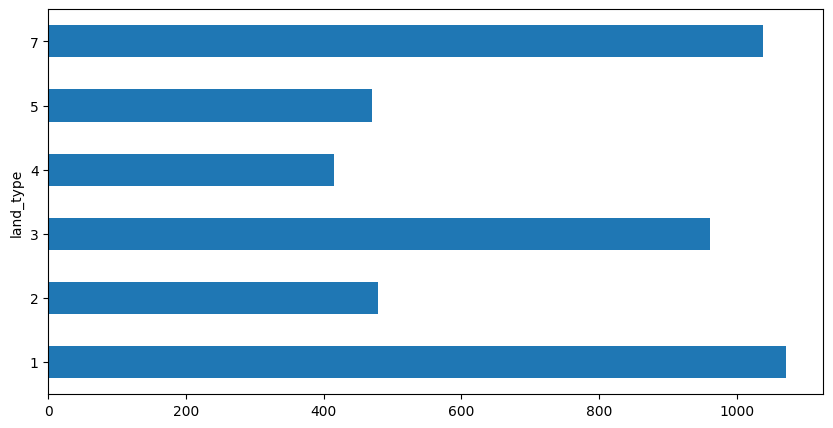

In [9]:
landTrain = pd.Series(landsat_train.land_type.groupby(landsat_train.land_type).count())
print(landTrain)
landTrain.plot(kind='barh', figsize=(10,5))

land_type
1    461
2    224
3    397
4    211
5    237
7    470
Name: land_type, dtype: int64


<Axes: ylabel='land_type'>

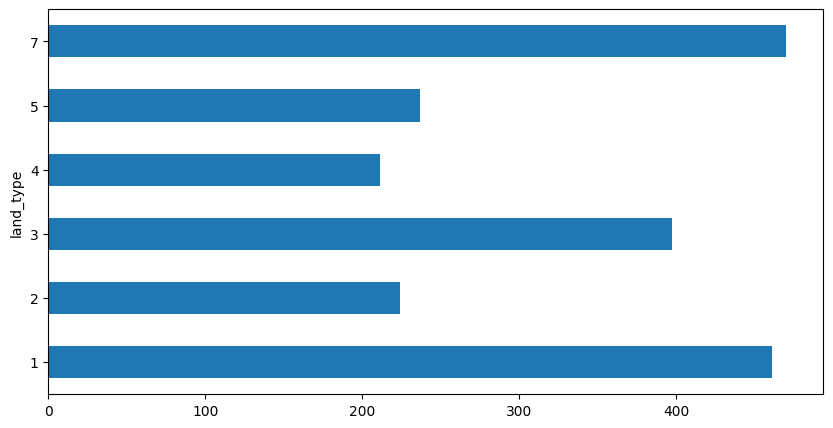

In [10]:
landTest = pd.Series(landsat_test.land_type.groupby(landsat_test.land_type).count())
print(landTest)
landTest.plot(kind='barh', figsize=(10,5))

### Splitting Data into Train/Test

In [11]:
landsat_train.dtypes

top_left_r              int64
top_left_g              int64
top_left_infra1         int64
top_left_infra2         int64
top_middle_r            int64
top_middle_g            int64
top_middle_infra1       int64
top_middle_infra2       int64
top_right_r             int64
top_right_g             int64
top_right_infra1        int64
top_right_infra2        int64
middle_left_r           int64
middle_left_g           int64
middle_left_infra1      int64
middle_left_infra2      int64
central_pixel_r         int64
central_pixel_g         int64
central_pixel_infra1    int64
central_pixel_infra2    int64
middle_right_r          int64
middle_right_g          int64
middle_right_infra1     int64
middle_right_infra2     int64
bottom_left_r           int64
bottom_left_g           int64
bottom_left_infra1      int64
bottom_left_infra2      int64
bottom_middle_r         int64
bottom_middle_g         int64
bottom_middle_infra1    int64
bottom_middle_infra2    int64
bottom_right_r          int64
bottom_rig

In [12]:
landsat_test.dtypes

top_left_r              int64
top_left_g              int64
top_left_infra1         int64
top_left_infra2         int64
top_middle_r            int64
top_middle_g            int64
top_middle_infra1       int64
top_middle_infra2       int64
top_right_r             int64
top_right_g             int64
top_right_infra1        int64
top_right_infra2        int64
middle_left_r           int64
middle_left_g           int64
middle_left_infra1      int64
middle_left_infra2      int64
central_pixel_r         int64
central_pixel_g         int64
central_pixel_infra1    int64
central_pixel_infra2    int64
middle_right_r          int64
middle_right_g          int64
middle_right_infra1     int64
middle_right_infra2     int64
bottom_left_r           int64
bottom_left_g           int64
bottom_left_infra1      int64
bottom_left_infra2      int64
bottom_middle_r         int64
bottom_middle_g         int64
bottom_middle_infra1    int64
bottom_middle_infra2    int64
bottom_right_r          int64
bottom_rig

In [13]:
X_train = landsat_train.iloc[:,:-1]
X_test = landsat_test.iloc[:,:-1]
y_train = landsat_train.land_type
y_test = landsat_test.land_type

### Building the Pipeline

In [14]:
num_attribs = ['top_left_r',             
'top_left_g',              
'top_left_infra1',         
'top_left_infra2',         
'top_middle_r',            
'top_middle_g',            
'top_middle_infra1',       
'top_middle_infra2',       
'top_right_r',             
'top_right_g',             
'top_right_infra1',        
'top_right_infra2',        
'middle_left_r',           
'middle_left_g',           
'middle_left_infra1',      
'middle_left_infra2',      
'central_pixel_r',         
'central_pixel_g',         
'central_pixel_infra1',    
'central_pixel_infra2',    
'middle_right_r',          
'middle_right_g',          
'middle_right_infra1',     
'middle_right_infra2',     
'bottom_left_r',           
'bottom_left_g',           
'bottom_left_infra1',      
'bottom_left_infra2',      
'bottom_middle_r',         
'bottom_middle_g',         
'bottom_middle_infra1',    
'bottom_middle_infra2',    
'bottom_right_r',          
'bottom_right_g',          
'bottom_right_infra1',     
'bottom_right_infra2']

In [15]:
col_transform = ColumnTransformer(transformers=[
    
    ('num', MinMaxScaler(), num_attribs)],
    remainder='passthrough'
)

In [16]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('rf', RandomForestClassifier(n_estimators=1000,
                                  max_samples=500,
                                  bootstrap=True,
                                  oob_score=True,
                                  n_jobs=-1))
    
])

### Executing the Model

In [17]:
pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left...
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('rf',
                 RandomForestClassifier(max_samples=500, n_estimators=1000,
                                        n_jobs=-1, oob_score=True))])

### Evaluating Model

In [18]:
y_pred = pipeline.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       461
           2       0.98      0.96      0.97       224
           3       0.86      0.95      0.91       397
           4       0.74      0.57      0.65       211
           5       0.91      0.77      0.84       237
           7       0.83      0.87      0.85       470

    accuracy                           0.88      2000
   macro avg       0.88      0.85      0.86      2000
weighted avg       0.88      0.88      0.88      2000



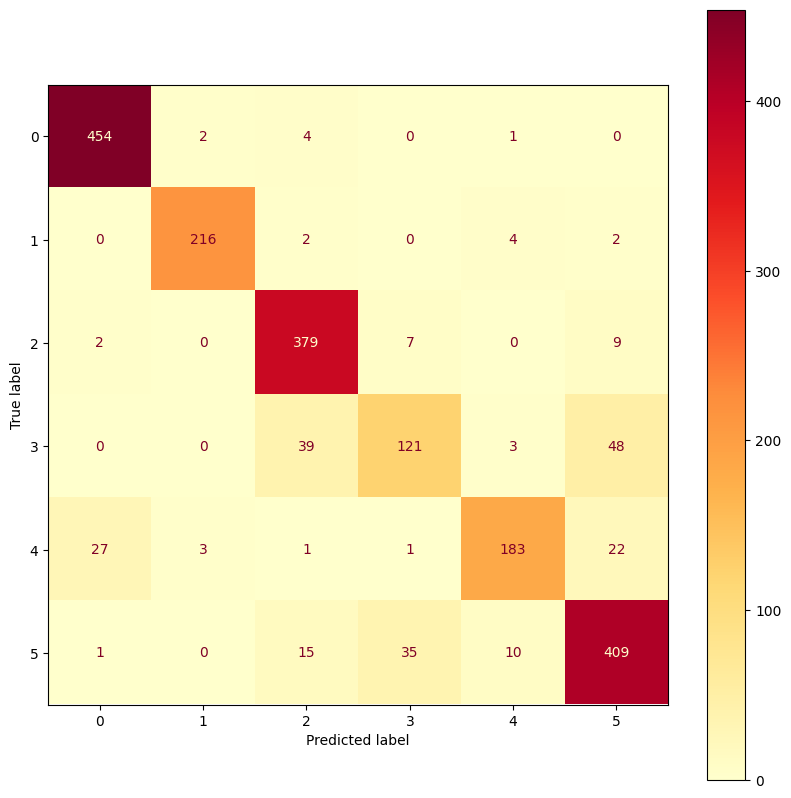

In [20]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap="YlOrRd")


### Conclusion
The model has an overall accuracy of 88%. The predictions for the first three land types are good (over 90%) but the predictions for the final 3 are lower with the highest percentage being 85% and the lowest 65%.

## Problem 2

### Reading the Data

In [24]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

### Splitting Data into Train/Test

In [25]:
X_train = landsat_train.iloc[:,:-1]
X_test = landsat_test.iloc[:,:-1]
y_train = landsat_train.land_type
y_test = landsat_test.land_type

### Building the Pipeline

In [26]:
num_attribs = ['top_left_r',             
'top_left_g',              
'top_left_infra1',         
'top_left_infra2',         
'top_middle_r',            
'top_middle_g',            
'top_middle_infra1',       
'top_middle_infra2',       
'top_right_r',             
'top_right_g',             
'top_right_infra1',        
'top_right_infra2',        
'middle_left_r',           
'middle_left_g',           
'middle_left_infra1',      
'middle_left_infra2',      
'central_pixel_r',         
'central_pixel_g',         
'central_pixel_infra1',    
'central_pixel_infra2',    
'middle_right_r',          
'middle_right_g',          
'middle_right_infra1',     
'middle_right_infra2',     
'bottom_left_r',           
'bottom_left_g',           
'bottom_left_infra1',      
'bottom_left_infra2',      
'bottom_middle_r',         
'bottom_middle_g',         
'bottom_middle_infra1',    
'bottom_middle_infra2',    
'bottom_right_r',          
'bottom_right_g',          
'bottom_right_infra1',     
'bottom_right_infra2']

In [27]:
col_transform = ColumnTransformer(transformers=[
    
    ('num', MinMaxScaler(), num_attribs)],
    remainder='passthrough'
)

In [29]:
bagging = Pipeline([
    ('transform', col_transform),
    ('bagging', BaggingClassifier(DecisionTreeClassifier(),
                                  n_estimators=1000,
                                  max_samples=500,
                                  bootstrap=True,
                                  n_jobs=-1))
])

### Executing the Model

In [30]:
bagging.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left...
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('bagging',
                 BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   max_samples=500, n_estimators=1000,
                                   n_jobs=-1))])

### Evaluating Model

In [31]:
y_pred = bagging.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       461
           2       0.98      0.95      0.97       224
           3       0.86      0.95      0.90       397
           4       0.69      0.59      0.64       211
           5       0.90      0.78      0.83       237
           7       0.84      0.86      0.85       470

    accuracy                           0.88      2000
   macro avg       0.87      0.85      0.86      2000
weighted avg       0.88      0.88      0.87      2000



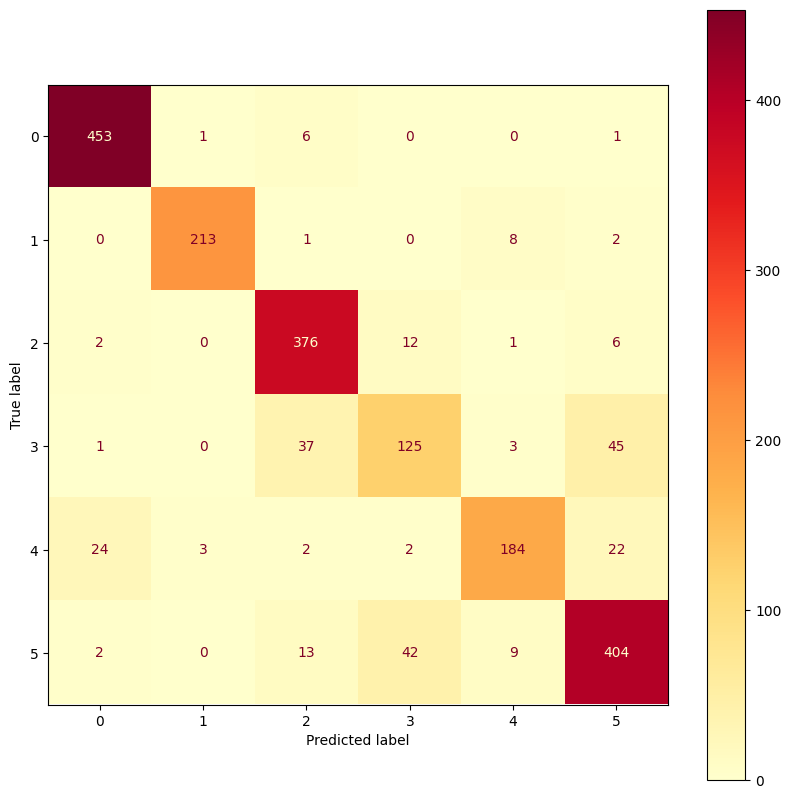

In [33]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap="YlOrRd")

### Conclusion
The model has an overall accuracy of 88% which is the same as the random forest classifier. The predictions for the first three land types are good (over 90%) but the predictions for the final 3 are lower with the highest percentage being 85% and the lowest 64%.

Problem 3


Reading the Data


In [34]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

In [35]:
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Splitting Data into Train/Test


In [36]:
X = df[['variance', 'skewness','curtosis','entropy']]
y = df[['forgery']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

Building the Pipeline


In [38]:
num_attribs = ['variance', 'skewness', 'curtosis','entropy']

In [39]:
col_transform = ColumnTransformer(transformers=[
    
    ('num', MinMaxScaler(), num_attribs)],
    remainder='passthrough'
)

In [42]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('rf', RandomForestClassifier(n_estimators=1000, max_samples=1000,
                                  bootstrap=True, oob_score=True, n_jobs=-1))
    
])

Executing the Model


In [43]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf',
                 RandomForestClassifier(max_samples=1000, n_estimators=1000,
                                        n_jobs=-1, oob_score=True))])

Evaluating Model


In [45]:
y_pred = pipeline.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.98      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



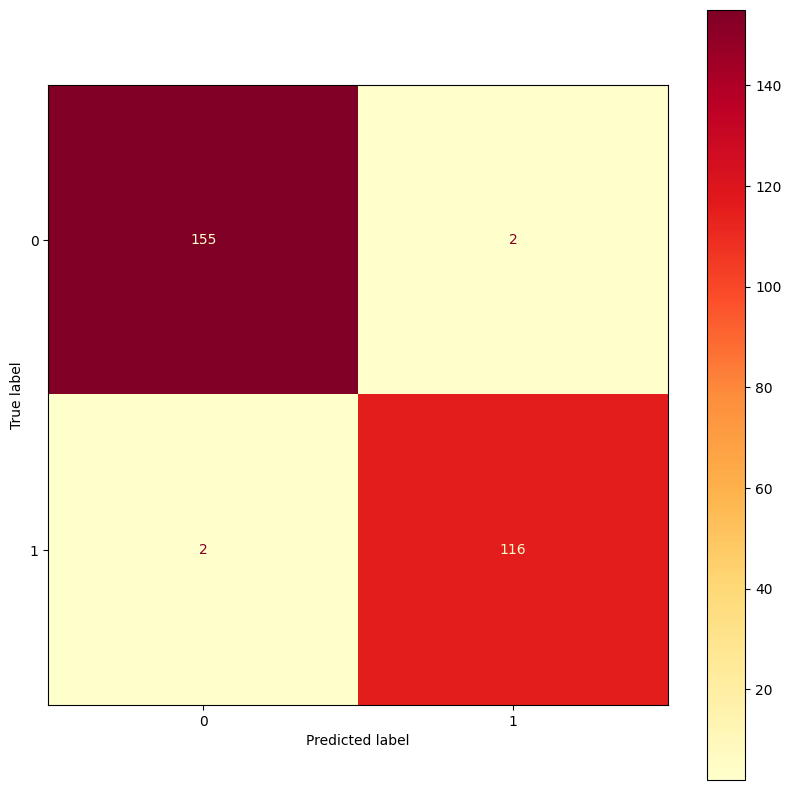

In [47]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap="YlOrRd")

Conclusion


The model has an overall accuracy of 88% of 99% which is extremely good. The overall f1 score for a 0 is 99% and for a 1 is 98%.
